# Analysis of the models' performances using certain features

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import utils
import numpy as np


In [2]:
plt.rcParams['savefig.dpi'] = 500
# set xticks fontsize
plt.rcParams['xtick.labelsize'] = 18
# set yticks fontsize
plt.rcParams['ytick.labelsize'] = 18
# set labels fontsize
plt.rcParams['axes.labelsize'] = 22
# set legend fontsize
plt.rcParams['legend.fontsize'] = 12
# set labels weight to bold
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
feature_importance = pd.read_csv('../data/features_importance/CV-PT/feature_importance_avg_all_seeds.csv')

In [4]:
path = '../tests/feature-selection-elbow/CV-PT'

In [5]:
experiments = os.listdir(path)

In [6]:
mean_results_list = []
features_list = []
for n_features in range(1, len(feature_importance)+1):
    exp_name = f'features_{n_features}'
    if exp_name not in experiments:
        break
    print(exp_name)
    exp_path = os.path.join(path, exp_name)
    results_df = utils.get_mean_results(exp_path)
    mean_results_list.append(results_df)
    features_list.append(n_features)
    

features_1
features_2
features_3
features_4
features_5
features_6
features_7
features_8
features_9
features_10
features_11
features_12
features_13
features_14
features_15
features_16
features_17
features_18
features_19
features_20
features_21
features_22
features_23
features_24
features_25
features_26
features_27
features_28
features_29
features_30
features_31
features_32
features_33
features_34
features_35
features_36
features_37
features_38
features_39
features_40
features_41
features_42
features_43


In [7]:
df = pd.concat(mean_results_list)
df.insert(0, '#FeaturesUsed', features_list)

In [8]:
ymin = 0.5
ymax = 1
interval = 0.05
y_ticks = np.arange(ymin, ymax+interval, interval, )

In [9]:
y_ticks

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [18]:
best_position = df.iloc[df.roc_auc_score.argmax()]
best_position

#FeaturesUsed              13.000000
NPV                         0.793622
NPV_std                     0.014970
balanced_accuracy           0.661347
balanced_accuracy_std       0.027637
f1_weighted                 0.750409
f1_weighted_std             0.022772
fn                         41.403333
fn_std                      3.762179
fp                         14.606667
fp_std                      3.765451
matthews_corrcoef           0.383354
matthews_corrcoef_std       0.058947
precision_weighted          0.756169
precision_weighted_std      0.024862
recall_weighted             0.769884
recall_weighted_std         0.020440
roc_auc_score               0.798596
roc_auc_score_std           0.028690
specificity                 0.915854
specificity_std             0.021718
tn                        158.993333
tn_std                      3.841001
tp                         28.396667
tp_std                      3.743348
train_time                  0.123402
train_time_std              0.084067
N

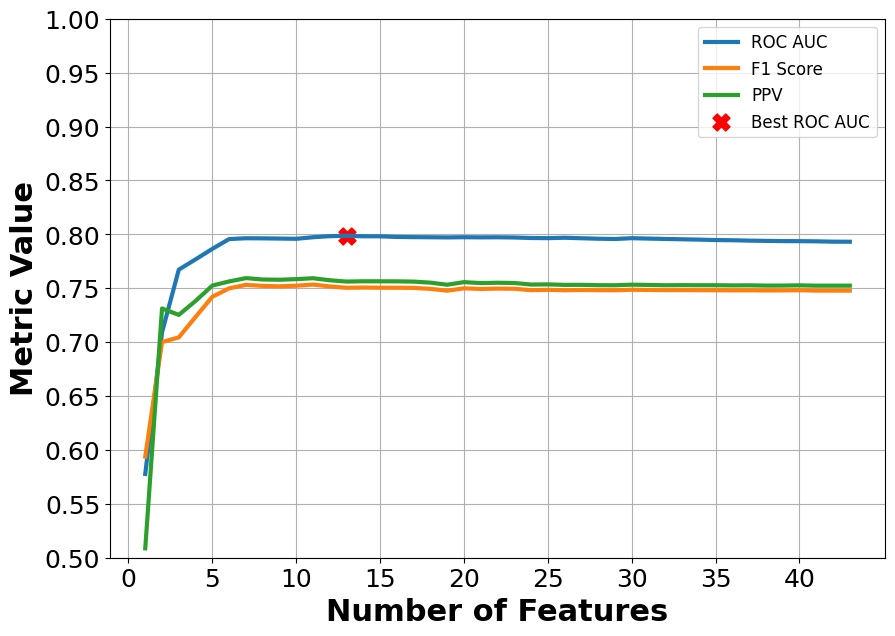

In [36]:
plt.figure()
plt.plot(df['#FeaturesUsed'], df['roc_auc_score'], lw=3, label='ROC AUC')
plt.plot(df['#FeaturesUsed'], df['f1_weighted'], lw=3, label='F1 Score')
plt.plot(df['#FeaturesUsed'], df['precision_weighted'], lw=3, label='PPV')
plt.scatter(best_position['#FeaturesUsed'], best_position['roc_auc_score'], marker='X', s=150,  color='red',label='Best ROC AUC')
plt.xlabel('Number of Features')
plt.ylabel('Metric Value')
# use grid of 5 values each in the x-axis
plt.xticks(range(0, len(df)+1, 5))
# use grid of 0.05 values each in the y-axis
plt.ylim(ymin, ymax)
plt.yticks(y_ticks)
plt.grid()
plt.legend()
plt.savefig('../images/features_selection_elbow.png')
plt.savefig('../images/features_selection_elbow.pdf')
plt.show()

In [22]:
df['roc_auc_score'].argmax()

12

In [24]:
df.iloc[df.roc_auc_score.argmax()]

#FeaturesUsed              13.000000
NPV                         0.793622
NPV_std                     0.014970
balanced_accuracy           0.661347
balanced_accuracy_std       0.027637
f1_weighted                 0.750409
f1_weighted_std             0.022772
fn                         41.403333
fn_std                      3.762179
fp                         14.606667
fp_std                      3.765451
matthews_corrcoef           0.383354
matthews_corrcoef_std       0.058947
precision_weighted          0.756169
precision_weighted_std      0.024862
recall_weighted             0.769884
recall_weighted_std         0.020440
roc_auc_score               0.798596
roc_auc_score_std           0.028690
specificity                 0.915854
specificity_std             0.021718
tn                        158.993333
tn_std                      3.841001
tp                         28.396667
tp_std                      3.743348
train_time                  0.123402
train_time_std              0.084067
N